# Part 1. 문제

In [1]:
#1. 본인이 생각하는 EDA란 어떠한 것인지 서술하시오.(Skip)
#2. 기초통계량을 통한 데이터 탐색과 데이터 시각화를 통해 결과를 자신의 언어로 서술하시오. (문제점이 있을 시 개인의 판단 아래 분석 진행)
#3. 주어진 데이터에서 문제점이 있다면, 그 문제점과 해결방안을 서술하시오.

In [2]:
#제공받은 데이터셋
#T1, T2 총 2개

#제공받은 변수 설명
#ID : ID of row
#V1 : Offer Price in EUROs (Target Variable)
#V2 : Age in months as in August 2004
#V3 : Accumulated Kilometers on odometer
#V4 : Fuel Type (Petrol, Diesel, CNG)
#V5 : Horse Power
#V6 : Cylinder Volume in cubic centimeters
#V7 : Number of doors
#V8 : Quarterly road tax in EUROs
#V9 : Automatic (Yes=1, No=0)
#V10 : Within Manufacturer's Guarantee period (Yes=1, No=0)
#V11 : Guarantee period in months
#V12 : Number of gear positions
#V13 : weight in Kilograms
#V14 : Color (Blue, Red, Grey, Silver, Black, etc.)

# Part 2. 데이터셋 합치기

In [3]:
import pandas as pd

In [4]:
#데이터셋 불러오기 및 변수명 지정
T1 = pd.read_csv('C:/Users/admin/Desktop/2021 YDMS 5기 모집과제/t1.csv')
T2 = pd.read_csv('C:/Users/admin/Desktop/2021 YDMS 5기 모집과제/t2.csv')

T1.columns = ['ID', 'Price', 'Age_In_Month', 'Kilometers', 'Fuel_Type', 'Horse_Power', 'Cylinder', 'Doors', 'Tax']
T2.columns = ['ID', 'Auto', 'Guarantee', 'G_Period', 'Gear', 'Weight', 'Color']

In [5]:
#1438행의 데이터셋
T1

,ID,Price,Age_In_Month,Kilometers,Fuel_Type,Horse_Power,Cylinder,Doors,Tax
0,1,13500,23,46986,Diesel,90,2000,3,210
1,2,13750,23,72937,Diesel,90,2000,3,210
2,3,13950,24,41711,Diesel,90,2000,3,210
3,4,14950,26,48000,Diesel,90,2000,3,210
4,5,13750,30,38500,Diesel,90,2000,3,210
...,...,...,...,...,...,...,...,...,...
1433,1438,7500,69,20544,Petrol,86,1300,3,69
1434,1439,10845,72,19000,Petrol,86,1300,3,69
1435,1440,8500,71,17016,Petrol,86,1300,3,69
1436,1441,7250,70,16916,Petrol,86,1300,3,69


In [6]:
#1437행의 데이터셋
T2

,ID,Auto,Guarantee,G_Period,Gear,Weight,Color
0,609,0,Yes,3.0,5,1000,Red
1,694,0,0,12.0,5,1000,Green
2,698,0,0,3.0,5,1000,Grey
3,706,0,1,3.0,5,1000,Red
4,854,0,0,3.0,5,1000,Blue
...,...,...,...,...,...,...,...
1432,112,0,0,3.0,5,1480,Grey
1433,113,0,1,3.0,5,1480,Grey
1434,964,0,0,3.0,5,1480,Green
1435,223,0,Yes,3.0,5,1615,Black


In [7]:
#T1은 1438행이고, T2는 1437행이므로 두 데이터 셋의 ID가 불일치함을 유추할 수 있음
#Outer Join시 불일치 ID의 경우, 절반 수준의 변수가 결측값이 되므로 이 경우에는 Inner Join을 사용해야 함

In [8]:
#T1과 T2에 공통으로 존재하는 ID라는 key를 이용하여 Inner Join
T12 = pd.merge(T1, T2, left_on = 'ID', right_on = 'ID', how = 'inner')
T12

,ID,Price,Age_In_Month,Kilometers,Fuel_Type,Horse_Power,Cylinder,Doors,Tax,Auto,Guarantee,G_Period,Gear,Weight,Color
0,1,13500,23,46986,Diesel,90,2000,3,210,0,0,3.0,5,1165,Blue
1,2,13750,23,72937,Diesel,90,2000,3,210,0,0,3.0,5,1165,Silver
2,3,13950,24,41711,Diesel,90,2000,3,210,0,1,3.0,5,1165,Blue
3,4,14950,26,48000,Diesel,90,2000,3,210,0,1,3.0,5,1165,Black
4,5,13750,30,38500,Diesel,90,2000,3,210,0,1,3.0,5,1170,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1438,7500,69,20544,Petrol,86,1300,3,69,0,1,3.0,5,1025,Blue
1437,1439,10845,72,19000,Petrol,86,1300,3,69,0,0,3.0,5,1015,Grey
1438,1440,8500,71,17016,Petrol,86,1300,3,69,0,0,3.0,5,1015,Blue
1439,1441,7250,70,16916,Petrol,86,1300,3,69,0,1,3.0,5,1015,Grey


In [9]:
#1438행의 T1과 1437행의 T2를 Inner Join한 결과, 1441행의 T12가 생성 되었음
#중복된 행들이 존재한다는 것을 유추할 수 있음

# Part 3. 중복 데이터 처리

In [10]:
#ID별로 그룹화 후 ID별 개수 확인 및 중복 ID 확인
Count = pd.DataFrame(T12.groupby('ID').Price.count().reset_index())
Count.columns = ['ID','Count']

Count_GT_1 = Count[Count['Count'] > 1]
Count_GT_1

,ID,Count
1199,1207,4
1429,1437,4


In [11]:
#중복 ID에 해당되는 행만 추출 및 ID 외의 나머지 변수들 값 확인
#ID별로 나머지 변수들이 모두 같다면 각 ID별로 첫 번째 행만 남기고 나머지 행 모두 제거
#나머지 변수들이 서로 다르다면, 어떤 행을 남길지 선택 or 해당 ID 모두 제거
T12[T12['ID'].isin(Count_GT_1['ID'])]

,ID,Price,Age_In_Month,Kilometers,Fuel_Type,Horse_Power,Cylinder,Doors,Tax,Auto,Guarantee,G_Period,Gear,Weight,Color
1199,1207,8950,74,88700,Petrol,110,1600,3,69,0,0,3.0,5,1050,Blue
1200,1207,8950,74,88700,Petrol,110,1600,3,69,0,0,3.0,5,1050,Blue
1201,1207,8950,74,88700,Petrol,110,1600,3,69,0,0,3.0,5,1050,Blue
1202,1207,8950,74,88700,Petrol,110,1600,3,69,0,0,3.0,5,1050,Blue
1368,1437,8450,80,23000,Petrol,86,1300,3,69,0,0,3.0,5,1015,Blue
1369,1437,8450,80,23000,Petrol,86,1300,3,69,0,0,3.0,5,1015,Blue
1370,1437,8450,80,23000,Petrol,86,1300,3,69,0,0,3.0,5,1015,Blue
1371,1437,8450,80,23000,Petrol,86,1300,3,69,0,0,3.0,5,1015,Blue


In [12]:
#확인 결과 ID가 중복인 데이터끼리는 나머지 모든 변수에 대한 값이 같으므로 각각 첫 번째 값만 남기고 모두 제거
#기존의 1441행에서 중복된 데이터(총 6행) 제거 결과, 1435행의 데이터셋 생성
T12 = T12.drop_duplicates(keep = 'first')
T12

,ID,Price,Age_In_Month,Kilometers,Fuel_Type,Horse_Power,Cylinder,Doors,Tax,Auto,Guarantee,G_Period,Gear,Weight,Color
0,1,13500,23,46986,Diesel,90,2000,3,210,0,0,3.0,5,1165,Blue
1,2,13750,23,72937,Diesel,90,2000,3,210,0,0,3.0,5,1165,Silver
2,3,13950,24,41711,Diesel,90,2000,3,210,0,1,3.0,5,1165,Blue
3,4,14950,26,48000,Diesel,90,2000,3,210,0,1,3.0,5,1165,Black
4,5,13750,30,38500,Diesel,90,2000,3,210,0,1,3.0,5,1170,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1438,7500,69,20544,Petrol,86,1300,3,69,0,1,3.0,5,1025,Blue
1437,1439,10845,72,19000,Petrol,86,1300,3,69,0,0,3.0,5,1015,Grey
1438,1440,8500,71,17016,Petrol,86,1300,3,69,0,0,3.0,5,1015,Blue
1439,1441,7250,70,16916,Petrol,86,1300,3,69,0,1,3.0,5,1015,Grey


# Part 4. 결측값 처리

In [13]:
#T12 데이터셋 변수별 결측값 확인 / G_Period 변수에만 결측값 6개 존재 확인
T12.isnull().sum()

ID              0
Price           0
Age_In_Month    0
Kilometers      0
Fuel_Type       0
Horse_Power     0
Cylinder        0
Doors           0
Tax             0
Auto            0
Guarantee       0
G_Period        6
Gear            0
Weight          0
Color           0
dtype: int64

In [14]:
#G_Period 변수에 결측값이 존재하는 행 확인
#G_Period가 결측값인 행들끼리는 나머지 변수에 대허서도 유사한 값을 보임
#Fuel_Type, Horse_Power, Cylinder, Tax, Auto, Gear, Weight가 같으면 동일한 차량에 대한 계약일 것으로 판단
#이를 통해 결측값 처리 진행
T12[T12['G_Period'].isnull()]

,ID,Price,Age_In_Month,Kilometers,Fuel_Type,Horse_Power,Cylinder,Doors,Tax,Auto,Guarantee,G_Period,Gear,Weight,Color
722,727,7950,61,88127,Petrol,86,1300,3,69,0,1,NaN,5,1015,Red
776,781,8950,68,77029,Petrol,86,1300,3,69,0,0,NaN,5,1015,Black
929,934,8750,61,55747,Petrol,86,1300,3,69,0,0,NaN,5,1020,Blue
987,993,9995,68,44458,Petrol,86,1300,3,69,0,1,NaN,5,1015,Red
1281,1286,7500,75,74000,Petrol,86,1300,3,69,0,0,NaN,5,1015,Black
1429,1430,7950,80,35821,Petrol,86,1300,3,19,1,0,NaN,5,1015,Red


In [15]:
#자동이 아니면서, 무게가 1015인 데이터의 중앙값
G_Period_Auto_0_Weight_1015 = T12[(T12['Fuel_Type'] == 'Petrol') & (T12['Horse_Power'] == 86) & (T12['Cylinder'] == 1300) &
                                  (T12['Tax'] == 69) & (T12['Auto'] == 0) & (T12['Gear'] == 5) & (T12['Weight'] == 1015) &
                                  (T12['G_Period'].notnull())]['G_Period'].median()
G_Period_Auto_0_Weight_1015

3.0

In [16]:
#자동이 아니면서, 무게가 1020인 데이터의 중앙값
G_Period_Auto_0_Weight_1020 = T12[(T12['Fuel_Type'] == 'Petrol') & (T12['Horse_Power'] == 86) & (T12['Cylinder'] == 1300) &
                                  (T12['Tax'] == 69) & (T12['Auto'] == 0) & (T12['Gear'] == 5) & (T12['Weight'] == 1020) &
                                  (T12['G_Period'].notnull())]['G_Period'].median()
G_Period_Auto_0_Weight_1020

3.0

In [17]:
#자동이면서, 무게가 1015인 데이터의 중앙값
G_Period_Auto_1_Weight_1015 = T12[(T12['Fuel_Type'] == 'Petrol') & (T12['Horse_Power'] == 86) & (T12['Cylinder'] == 1300) &
                                  (T12['Tax'] == 19) & (T12['Auto'] == 1) & (T12['Gear'] == 5) & (T12['Weight'] == 1015) &
                                  (T12['G_Period'].notnull())]['G_Period'].median()
G_Period_Auto_1_Weight_1015

12.0

In [18]:
#중앙값으로 결측값 대체하기
T12.loc[T12[(T12['Fuel_Type'] == 'Petrol') & (T12['Horse_Power'] == 86) & (T12['Cylinder'] == 1300) &
        (T12['Tax'] == 69) & (T12['Auto'] == 0) & (T12['Gear'] == 5) & (T12['Weight'] == 1015) &
        (T12['G_Period'].isnull())]['G_Period'].index, 'G_Period'] = G_Period_Auto_0_Weight_1015

T12.loc[T12[(T12['Fuel_Type'] == 'Petrol') & (T12['Horse_Power'] == 86) & (T12['Cylinder'] == 1300) &
        (T12['Tax'] == 69) & (T12['Auto'] == 0) & (T12['Gear'] == 5) & (T12['Weight'] == 1020) &
        (T12['G_Period'].isnull())]['G_Period'].index, 'G_Period'] = G_Period_Auto_0_Weight_1020

T12.loc[T12[(T12['Fuel_Type'] == 'Petrol') & (T12['Horse_Power'] == 86) & (T12['Cylinder'] == 1300) &
        (T12['Tax'] == 19) & (T12['Auto'] == 1) & (T12['Gear'] == 5) & (T12['Weight'] == 1015) &
        (T12['G_Period'].isnull())]['G_Period'].index, 'G_Period'] = G_Period_Auto_1_Weight_1015

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [19]:
#결측치 대체 후 변수별 결측값 재확인
T12.isnull().sum()

ID              0
Price           0
Age_In_Month    0
Kilometers      0
Fuel_Type       0
Horse_Power     0
Cylinder        0
Doors           0
Tax             0
Auto            0
Guarantee       0
G_Period        0
Gear            0
Weight          0
Color           0
dtype: int64

# Part 5. 시각화 및 이상치 처리

In [20]:
#변수 형식 확인
T12.dtypes

ID                int64
Price             int64
Age_In_Month      int64
Kilometers        int64
Fuel_Type        object
Horse_Power       int64
Cylinder          int64
Doors             int64
Tax               int64
Auto              int64
Guarantee        object
G_Period        float64
Gear              int64
Weight            int64
Color            object
dtype: object

In [21]:
#요약통계량 확인 및 변수 형식 타당성 확인
#Doors, Auto, Gear는 범주형 변수로 변환이 필요함을 확인
T12.describe(include = 'all')

,ID,Price,Age_In_Month,Kilometers,Fuel_Type,Horse_Power,Cylinder,Doors,Tax,Auto,Guarantee,G_Period,Gear,Weight,Color
count,1435.000000,1435.000000,1435.000000,1435.000000,1435,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435,1435.000000,1435.000000,1435.000000,1435
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,10
top,NaN,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Grey
freq,NaN,NaN,NaN,NaN,1264,NaN,NaN,NaN,NaN,NaN,780,NaN,NaN,NaN,300
mean,721.978397,10720.915679,55.980488,68571.782578,NaN,101.491986,1576.560976,4.032753,87.020209,0.064111,NaN,3.822300,5.026481,1078.558885,NaN
std,416.312827,3608.732978,18.563312,37491.094553,NaN,14.981408,424.387533,0.952667,40.959588,0.261555,NaN,3.019657,0.188575,241.389483,NaN
min,1.000000,4350.000000,1.000000,1.000000,NaN,69.000000,1300.000000,2.000000,19.000000,0.000000,NaN,3.000000,3.000000,1000.000000,NaN
25%,362.500000,8450.000000,44.000000,43000.000000,NaN,90.000000,1400.000000,3.000000,69.000000,0.000000,NaN,3.000000,5.000000,1040.000000,NaN
50%,722.000000,9900.000000,61.000000,63451.000000,NaN,110.000000,1600.000000,4.000000,85.000000,0.000000,NaN,3.000000,5.000000,1070.000000,NaN
75%,1081.500000,11950.000000,70.000000,87041.500000,NaN,110.000000,1600.000000,5.000000,85.000000,0.000000,NaN,3.000000,5.000000,1085.000000,NaN


In [22]:
#숫자로 기입된 범주형 변수들 변환하기 / 변수별 형식 재확인
T12['Doors'] = T12['Doors'].astype('str')
T12['Auto'] = T12['Auto'].astype('str')
T12['Gear'] = T12['Gear'].astype('str')
T12.dtypes

<ipython-input-22-f3fb07976558>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T12['Doors'] = T12['Doors'].astype('str')
<ipython-input-22-f3fb07976558>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T12['Auto'] = T12['Auto'].astype('str')
<ipython-input-22-f3fb07976558>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

ID                int64
Price             int64
Age_In_Month      int64
Kilometers        int64
Fuel_Type        object
Horse_Power       int64
Cylinder          int64
Doors            object
Tax               int64
Auto             object
Guarantee        object
G_Period        float64
Gear             object
Weight            int64
Color            object
dtype: object

Text(0, 0.5, 'Frequency')

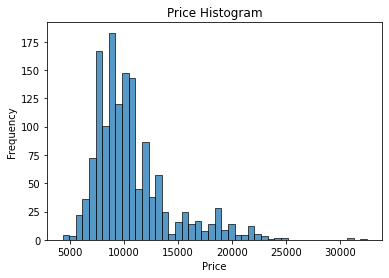

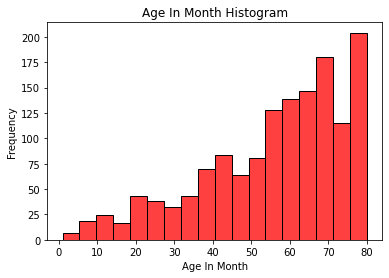

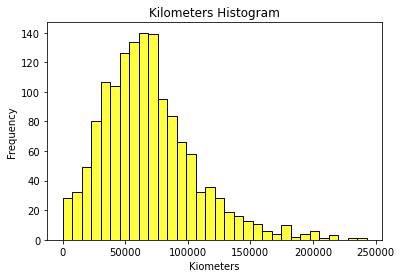

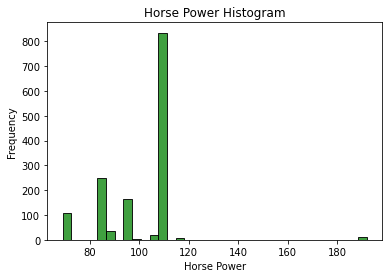

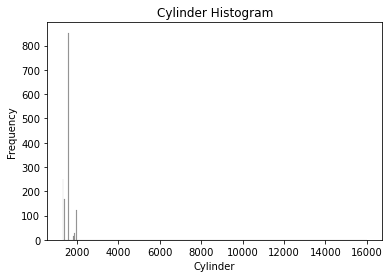

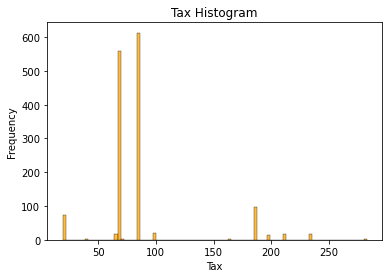

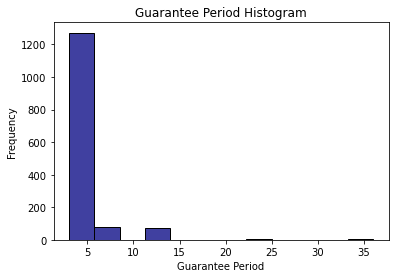

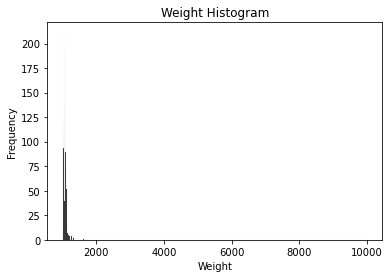

In [23]:
#연속형 변수 히스토그램 그리기
import matplotlib.pyplot as plt
import seaborn as sns

ax1 = plt.subplots()
ax1 = sns.histplot(T12['Price'], kde = False)
ax1.set_title('Price Histogram')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')

ax2 = plt.subplots()
ax2 = sns.histplot(T12['Age_In_Month'], kde = False, color ='red')
ax2.set_title('Age In Month Histogram')
ax2.set_xlabel('Age In Month')
ax2.set_ylabel('Frequency')

ax3 = plt.subplots()
ax3 = sns.histplot(T12['Kilometers'], kde = False, color ='yellow')
ax3.set_title('Kilometers Histogram')
ax3.set_xlabel('Kiometers')
ax3.set_ylabel('Frequency')

ax4 = plt.subplots()
ax4 = sns.histplot(T12['Horse_Power'], kde = False, color ='green')
ax4.set_title('Horse Power Histogram')
ax4.set_xlabel('Horse Power')
ax4.set_ylabel('Frequency')

ax5 = plt.subplots()
ax5 = sns.histplot(T12['Cylinder'], kde = False, color ='grey')
ax5.set_title('Cylinder Histogram')
ax5.set_xlabel('Cylinder')
ax5.set_ylabel('Frequency')

ax6 = plt.subplots()
ax6 = sns.histplot(T12['Tax'], kde = False, color ='orange')
ax6.set_title('Tax Histogram')
ax6.set_xlabel('Tax')
ax6.set_ylabel('Frequency')

ax7 = plt.subplots()
ax7 = sns.histplot(T12['G_Period'], kde = False, color ='navy')
ax7.set_title('Guarantee Period Histogram')
ax7.set_xlabel('Guarantee Period')
ax7.set_ylabel('Frequency')

ax8 = plt.subplots()
ax8 = sns.histplot(T12['Weight'], kde = False, color ='black')
ax8.set_title('Weight Histogram')
ax8.set_xlabel('Weight')
ax8.set_ylabel('Frequency')

In [24]:
#히스토그램 생성 결과, Cylinder 변수와 Weight 변수에 이상치가 존재함을 유추할 수 있음
#G_Period 변수의 경우, 12개월을 기준으로 Binning을 하기로 결정

In [25]:
#Cylinder 변수의 이상치 확인
#Cylinder를 기준으로 내림차순 정렬 결과, 나머지 모든 값이 1300 ~ 2000 사이에 분포하고 있음을 확인
#위와 같은 근거로 ID 81의 16000이라는 수치는 이상치로 판단
Cylinder = T12.sort_values(by = 'Cylinder', ascending = False)
Cylinder.head()

,ID,Price,Age_In_Month,Kilometers,Fuel_Type,Horse_Power,Cylinder,Doors,Tax,Auto,Guarantee,G_Period,Gear,Weight,Color
80,81,18950,25,20019,Petrol,110,16000,5,100,1,0,3.0,5,1180,Blue
0,1,13500,23,46986,Diesel,90,2000,3,210,0,0,3.0,5,1165,Blue
1070,1076,7750,70,151300,Diesel,72,2000,5,185,0,0,3.0,5,1150,Black
1091,1098,7250,71,127159,Diesel,72,2000,3,185,0,0,3.0,5,1115,Red
1084,1091,7950,79,131500,Diesel,72,2000,5,185,2,No,3.0,5,1140,Blue


In [26]:
#Cylinder 변수의 이상치 제거
#이상치로 판단되는 데이터가 1개 밖에 없으므로 해당 데이터를 제거하기로 결정
T12 = T12.drop(T12[T12['Cylinder'] == 16000].index)

Text(0, 0.5, 'Frequency')

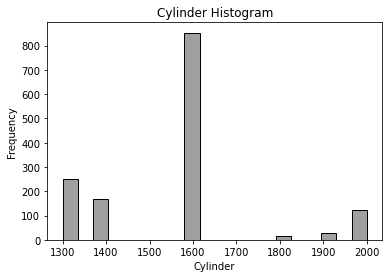

In [27]:
#Cylinder 변수 이상치 처리 후 히스토그램 재생성
ax = plt.subplots()
ax = sns.histplot(T12['Cylinder'], kde = False, color ='grey')
ax.set_title('Cylinder Histogram')
ax.set_xlabel('Cylinder')
ax.set_ylabel('Frequency')

In [28]:
#Weight 변수의 이상치 확인 및 제거
#Weight를 기준으로 내림차순 정렬 결과, 나머지 모든 값이 1000 ~ 1615 사이에 분포하고 있음을 확인
#위와 같은 근거로 ID 1276의 10000이라는 수치는 이상치로 판단
Weight = T12.sort_values(by = 'Weight', ascending = False)
Weight.head()

,ID,Price,Age_In_Month,Kilometers,Fuel_Type,Horse_Power,Cylinder,Doors,Tax,Auto,Guarantee,G_Period,Gear,Weight,Color
1271,1276,8750,69,75000,Petrol,86,1300,4,69,0,1,3.0,5,10000,Red
220,223,12450,44,74172,Petrol,110,1600,5,163,0,Yes,3.0,5,1615,Black
110,112,31000,4,4000,Diesel,116,2000,5,283,0,0,3.0,5,1480,Grey
109,111,32500,4,1,Diesel,116,2000,5,283,2,1,3.0,5,1480,Grey
959,964,9390,66,50806,Petrol,86,1300,3,19,0,0,3.0,5,1480,Green


In [29]:
#Weight 변수의 이상치 제거
#이상치로 판단되는 데이터가 1개 밖에 없으므로 해당 데이터를 제거하기로 결정
T12 = T12.drop(T12[T12['Weight'] == 10000].index)

Text(0, 0.5, 'Frequency')

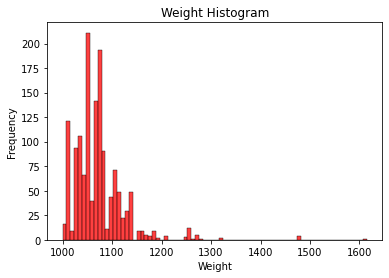

In [30]:
#Weight 변수 이상치 처리 후 히스토그램 재생성
ax = plt.subplots()
ax = sns.histplot(T12['Weight'], kde = False, color ='red')
ax.set_title('Weight Histogram')
ax.set_xlabel('Weight')
ax.set_ylabel('Frequency')

In [46]:
#G_Period를 12개월 단위로 Binning하여 G_Period_Group 변수 생성
def Group(Month):
    if Month <= 12:
        return '1year'
    elif Month <= 24:
        return '2year'
    else:
        return '3year'

T12['G_Period_Group'] = T12.apply(lambda x: Group(x['G_Period']), axis = 1)
T12

,ID,Price,Age_In_Month,Kilometers,Fuel_Type,Horse_Power,Cylinder,Doors,Tax,Auto,Guarantee,G_Period,Gear,Weight,Color,G_Period_Group
0,1,13500,23,46986,Diesel,90,2000,3,210,0,0,3.0,5,1165,Blue,1year
1,2,13750,23,72937,Diesel,90,2000,3,210,0,0,3.0,5,1165,Silver,1year
2,3,13950,24,41711,Diesel,90,2000,3,210,0,1,3.0,5,1165,Blue,1year
3,4,14950,26,48000,Diesel,90,2000,3,210,0,1,3.0,5,1165,Black,1year
4,5,13750,30,38500,Diesel,90,2000,3,210,0,1,3.0,5,1170,Black,1year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1438,7500,69,20544,Petrol,86,1300,3,69,0,1,3.0,5,1025,Blue,1year
1437,1439,10845,72,19000,Petrol,86,1300,3,69,0,0,3.0,5,1015,Grey,1year
1438,1440,8500,71,17016,Petrol,86,1300,3,69,0,0,3.0,5,1015,Blue,1year
1439,1441,7250,70,16916,Petrol,86,1300,3,69,0,1,3.0,5,1015,Grey,1year


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\si

Text(0, 0.5, 'Frequency')

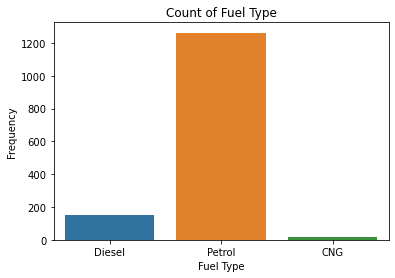

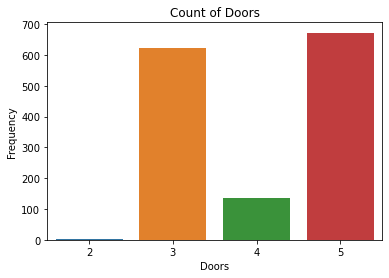

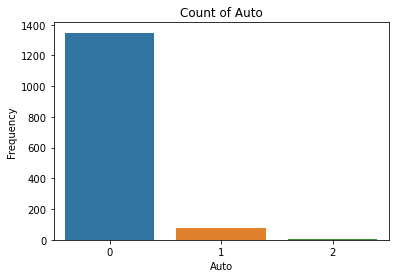

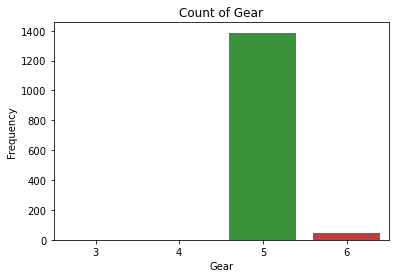

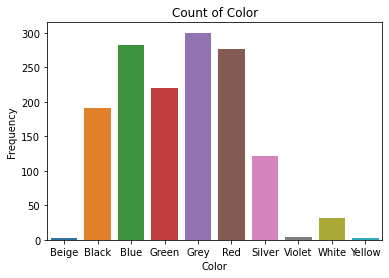

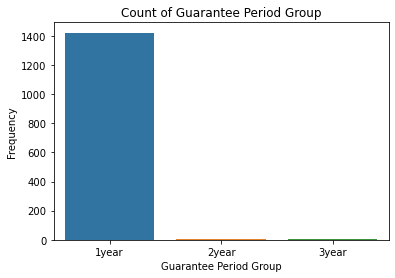

In [50]:
#범주형 변수 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns
import natsort

ax1 = plt.subplots()
ax1 = sns.countplot(T12['Fuel_Type'])
ax1.set_title('Count of Fuel Type')
ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Frequency')

ax2 = plt.subplots()
ax2 = sns.countplot(natsort.natsorted(T12['Doors']))
ax2.set_title('Count of Doors')
ax2.set_xlabel('Doors')
ax2.set_ylabel('Frequency')

ax3 = plt.subplots()
ax3 = sns.countplot(T12['Auto'])
ax3.set_title('Count of Auto')
ax3.set_xlabel('Auto')
ax3.set_ylabel('Frequency')

ax4 = plt.subplots()
ax4 = sns.countplot(sorted(T12['Gear']))
ax4.set_title('Count of Gear')
ax4.set_xlabel('Gear')
ax4.set_ylabel('Frequency')

ax5 = plt.subplots()
ax5 = sns.countplot(sorted(T12['Color']))
ax5.set_title('Count of Color')
ax5.set_xlabel('Color')
ax5.set_ylabel('Frequency')

ax6 = plt.subplots()
ax6 = sns.countplot(T12['G_Period_Group'])
ax6.set_title('Count of Guarantee Period Group')
ax6.set_xlabel('Guarantee Period Group')
ax6.set_ylabel('Frequency')